# Excitation forces

We want to estimate the excitation forces on circular cylindrical tank on the sea-floor due to long incident waves.
The water depth is $h=50$ m and the tank height and diameter is $d=10$ m and $D=20$ m, respectively.
Added masses in heave and sway of the structure is $A_{33}=\rho D^3/6$ and $A_{22}=\rho\nabla d/(2h-d)$, where $\nabla$ is the displacement of the tank.
The tank is exposed to incident regular waves with period $T=16$ s and amplitude $\zeta_a=10$ m. The dispersion relation for finite water depth is
$$\omega^2=gk\tanh kh$$

When the structure is small compared to incindent wave length, the excitation forces from the waves can be approximated as
$$
F_i = -\iint_S p n_i \mathrm{d}S + A_{i1}a_1+A_{i2}a_2+A_{i3}a_3
$$
<div>
<img src="Figures/tank_on_seabed.PNG" width="600">
</div>

1) What is coupled added mass $A_{32}$?
2) Find the vertical and horizontal excitation force from the waves.

Waterdepth to wavelength ratio, h/L=0.16
Excitation forces:
F3_tot : 20.244 MN
F3_fk  : 20.070 MN
F3_diff: 0.174 MN
F1_tot : 4.482 MN
F1_fk  : 4.034 MN
F1_diff: 0.448 MN


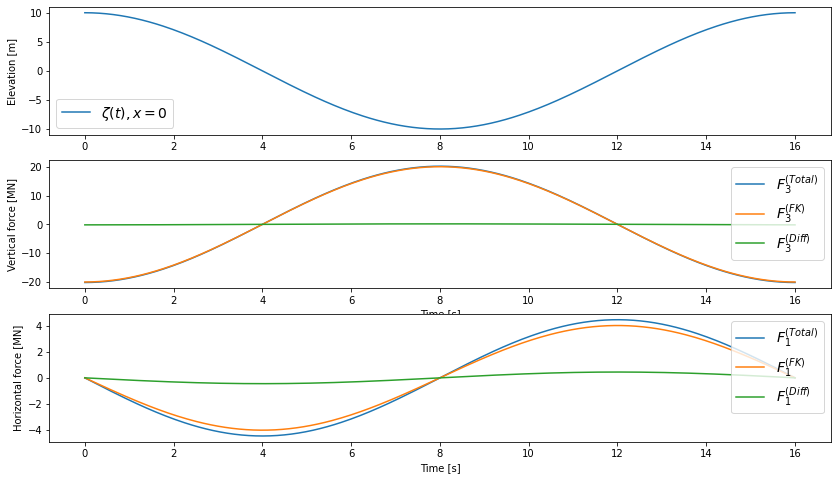

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import airywavelib as aw

# Input information:
h = 50. # [m] Water depth
D = 20. # [m] Tank diameter
d = 10. # [m] Tank height

# Wave data:
A = 10. # [m] Wave amplitude
T = 16. # [s] Wave period

rho = 1000. # [kg/m^3] Water density

nabla = np.pi*(D**2/4.)*d # Displacement
A11 = rho*nabla*d/(2*h-d) # Surge added mass
A33 = rho*D**3/6.         # Heave added mass

# Construct wave:
wave = aw.airywave(T, A, waterDepth=h)

wavenum = wave.k
wavelen = 2*np.pi/wavenumber

print("Waterdepth to wavelength ratio, h/L={:.2f}".format(h/wavelen))

# Vertical Froude-Kriloff force
# We assume uniform pressure over the tank top, evaluated at area center zt=-h+d.
zt = -h+d      # Vertical coord. of tank top
zm = -h+0.5*d  # Vertical coord. of tank centre

# Vertical forces:
F3_fk = lambda t: -(np.pi*D**2/4.) * wave.getDynamicPressure(0,zt,t) # You should practice derivation of pressure and accelerations by hand.
F3_diff = lambda t: A33*wave.getParticleAcceleration(0,zm, t)[1]

# Horizontal forces:
F1_fk = lambda t: rho*nabla*wave.getParticleAcceleration(0,zm, t)[0] # You should practice derivation of pressure and accelerations by hand.
F1_diff = lambda t: A11*wave.getParticleAcceleration(0,zm, t)[0]

tvec = np.linspace(0,T,300)

F3_max = np.max(F3_fk(tvec)+F3_diff(tvec))
F3fk_max = np.max(F3_fk(tvec))
F3diff_max = np.max(F3_diff(tvec))

F1_max = np.max(F1_fk(tvec)+F1_diff(tvec))
F1fk_max = np.max(F1_fk(tvec))
F1diff_max = np.max(F1_diff(tvec))

print("Excitation forces:")
print("F3_tot : {:.3f} MN".format(F3_max*1e-6))
print("F3_fk  : {:.3f} MN".format(F3fk_max*1e-6))
print("F3_diff: {:.3f} MN".format(F3diff_max*1e-6))
print("F1_tot : {:.3f} MN".format(F1_max*1e-6))
print("F1_fk  : {:.3f} MN".format(F1fk_max*1e-6))
print("F1_diff: {:.3f} MN".format(F1diff_max*1e-6))


# Plot results
gs = gridspec.GridSpec(nrows=3, ncols=1)
fig = plt.figure(figsize=(14,8))

# Plot surface elevation:
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(tvec, wave.getSurfaceElevation(0, tvec), label=r'$\zeta(t), x=0$')
ax1.legend(fontsize=14)
ax1.set_ylabel('Elevation [m]')

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(tvec, (F3_fk(tvec)+F3_diff(tvec))*1e-6, label=r'$F_3^{(Total)}$')
ax2.plot(tvec, F3_fk(tvec)*1e-6, label=r'$F_3^{(FK)}$')
ax2.plot(tvec, F3_diff(tvec)*1e-6, label=r'$F_3^{(Diff)}$')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Vertical force [MN]')
ax2.legend(fontsize=14)

ax3 = fig.add_subplot(gs[2,0])
ax3.plot(tvec, (F1_fk(tvec)+F1_diff(tvec))*1e-6, label=r'$F_1^{(Total)}$')
ax3.plot(tvec, F1_fk(tvec)*1e-6, label=r'$F_1^{(FK)}$')
ax3.plot(tvec, F1_diff(tvec)*1e-6, label=r'$F_1^{(Diff)}$')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Horizontal force [MN]')
ax3.legend(fontsize=14)

## Example: Wave induced motions of semi-submercible
We will now consider a floating semi-submercible platform with two regantular cylindrical pontoons, supporting four vertical circular cylindrical columns.
The pontoons have lenght $L=100$ m and rectangular cross-section with dimensions $a=11$ m and $b=7$ m as with and height, respectively. Depth to top side of the pontoons is $h_t=15$ m.


In [ ]:
# code example


In [7]:
# Dimensions of concrete semi-submercible platform for 10 MW offshore wind turbine
feet_to_meters = 1./3.2808 # [m/ft]   unit conversion
inches_to_meters = 0.0254  # [m/inch] unit conversion

D = 311*feet_to_meters + 6*inches_to_meters # Base diameter
d = 37*feet_to_meters                       # Column diameter
hb = 65*feet_to_meters + 7.5*inches_to_meters # Total draft (depth to bottom of pontoon)
ht = 44*feet_to_meters + 4.5*inches_to_meters # Depth to top of pontoon

# Pontoon cross-section:
width = d
height = hb-ht

print("Base diameter   : {:.2f} m".format(D))
print("Column diameter : {:.2f} m".format(d))
print("Total draft     : {:.2f} m".format(hb))
print("Depth to pontoon: {:.2f} m".format(ht))
print("Pontoon width   : {:.2f} m".format(width))
print("Pontoon height  : {:.2f} m".format(height))

Base diameter   : 94.95 m
Column diameter : 11.28 m
Total draft     : 20.00 m
Depth to pontoon: 13.53 m
Pontoon width   : 11.28 m
Pontoon height  : 6.48 m


()


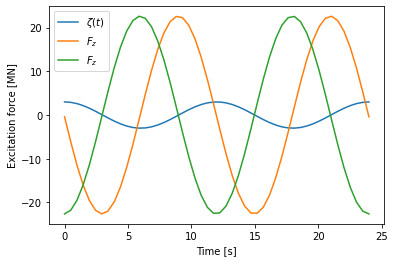

In [34]:
# Excitation forces by use of strip theory
rho = 1025.

area2d = width*height # Cross-section area of pontoon
zm = -ht + 0.5*height # Depth to area center of cross-section

# Divide pontoons into strips
rvec, dr = np.linspace(0, 0.5*D, 50, retstep=True)
rmvec = np.diff(rvec) # Strip mean radial coordinate
Nstrip = len(rmvec)   # Number of strips

# Pontoon angles
theta1 = 0. * np.pi/180.
theta2 = -120. * np.pi/180.
theta3 = 120. * np.pi/180.

# coordinates of stip mean pos
xm1 = -np.flip(rmvec)
xm2 = rmvec*np.cos(theta2)
xm3 = rmvec*np.cos(theta3)
xm = np.concatenate((xm1,xm2,xm3))

# Added masses of 2d cross-section:
a22_2d = 1.4*rho*area2d*height/width # Coefficient from Fig. 3.25
a33_2d = 1.4*rho*area2d*width/height # Coefficient from Fig. 3.25

# Design wave:
T = 12.0 # [s] Wave period
A = 3.0  # [m] Wave amplitude

wave = aw.airywave(T, A)


# Vertical excitation force on pontoons:
dF = np.array([((rho*area2d + a22_2d), rho*area2d + a33_2d)])
F3 = lambda t: np.array([*np.sum(wave.getParticleAcceleration(xm,zm,ti), axis=1)*dr for ti in t]) # we must sum over all strips

print(np.shape(F3))

tvec = np.linspace(0,2*T)

#print(wave.getParticleAcceleration(xm,zm,0))

# Plot results:
plt.figure()
plt.plot(tvec, wave.getSurfaceElevation(0, tvec), label=r'$\zeta(t)$')
plt.plot(tvec, F3(tvec)*1e-6, label=r'$F_z$')
plt.xlabel('Time [s]')
plt.ylabel('Excitation force [MN]')
plt.legend()
